In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline 

In [91]:
path = r"E:\Downloads\^DJI.xlsx"

dowj_data = pd.read_excel(path)

dowj_data.index = pd.to_datetime(dowj_data['Date'])

dowj_data = dowj_data.drop(['Date'], axis = 1)
dowj_data = dowj_data.drop(['Open'], axis = 1)
dowj_data = dowj_data.drop(['High'], axis = 1)
dowj_data = dowj_data.drop(['Low'], axis = 1)
dowj_data = dowj_data.drop(['Day Change'], axis = 1)
dowj_data = dowj_data.drop(['Close'], axis = 1)
dowj_data = dowj_data.drop(['Adj Close'], axis = 1)
dowj_data.head()
dowj_data.describe()

,Range,Volume
count,9067.000000,9.067000e+03
mean,128.931951,1.474262e+08
std,130.839970,1.310380e+08
min,6.000000,2.530000e+06
25%,48.000000,2.734000e+07
50%,95.000000,1.136200e+08
75%,164.000000,2.351750e+08
max,1904.000000,2.190810e+09


In [34]:
dowj_data.dtypes

Range     int64
Volume    int64
dtype: object

In [98]:
new_column_names = {'Range': 'Day_Range'}

dowj_data = dowj_data.rename(columns = new_column_names)
dowj_data.head()

,Day_Range,Volume
Date,,
2021-01-19,221,386400000
2021-01-15,329,433000000
2021-01-14,241,427810000
2021-01-13,161,413250000
2021-01-12,225,362620000


In [36]:
#display(dowj_data.isna().any())
#dowj_data = dowj_data.dropna()
#dowj_data.isna().any()

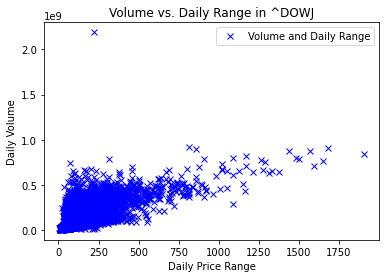

In [99]:
x = dowj_data['Day_Range']
y = dowj_data['Volume']

plt.plot(x,y, 'x', color = 'blue', label = 'Volume and Daily Range')
plt.title("Volume vs. Daily Range in ^DOWJ")
plt.xlabel("Daily Price Range")
plt.ylabel("Daily Volume")
plt.legend()
plt.show()

In [100]:
dowj_data.corr()

,Day_Range,Volume
Day_Range,1.000000,0.656204
Volume,0.656204,1.000000


In [101]:
dowj_data.describe()

,Day_Range,Volume
count,9067.000000,9.067000e+03
mean,128.931951,1.474262e+08
std,130.839970,1.310380e+08
min,6.000000,2.530000e+06
25%,48.000000,2.734000e+07
50%,95.000000,1.136200e+08
75%,164.000000,2.351750e+08
max,1904.000000,2.190810e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026ACC0418E0>,
      dtype=object)

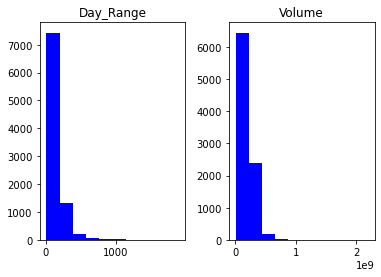

In [102]:
dowj_data.hist(grid = False, color= 'blue')

'Volume kurtosis: 7.7655964734122715'

'Range kurtosis:  2.8e+01'

'Range skew:  4.0'

'Volume skew:  1.4'

(array([  16.,  616., 1663., 2026., 2382., 1604.,  556.,  138.,   52.,
          14.]),
 array([ 1.96231199,  2.89405664,  3.82580129,  4.75754593,  5.68929058,
         6.62103523,  7.55277988,  8.48452453,  9.41626918, 10.34801383,
        11.27975847]),
 <a list of 10 Patch objects>)

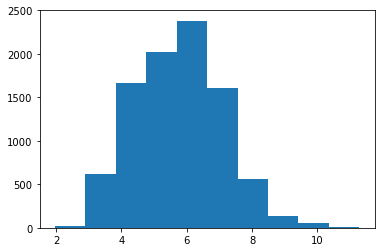

In [103]:
Range_kurtosis = kurtosis(dowj_data['Day_Range'],fisher = True)
Volume_kurtosis = kurtosis(dowj_data['Volume'], fisher = True) 

Range_skew = skew(dowj_data['Day_Range'])
Volume_skew = skew(dowj_data['Volume']) 

display("Volume kurtosis: {:2}".format(Volume_kurtosis))
display("Range kurtosis: {: .2}".format(Range_kurtosis))

display("Range skew: {: .2}".format(Range_skew))
display("Volume skew: {: .2}".format(Volume_skew))

plt.hist(stats.boxcox(dowj_data['Day_Range'],lmbda=0.10))


(array([1.900e+02, 2.407e+03, 1.004e+03, 1.474e+03, 2.424e+03, 1.371e+03,
        1.780e+02, 1.800e+01, 0.000e+00, 1.000e+00]),
 array([155.52917587, 226.11511831, 296.70106076, 367.2870032 ,
        437.87294565, 508.45888809, 579.04483054, 649.63077298,
        720.21671543, 790.80265787, 861.38860032]),
 <a list of 10 Patch objects>)

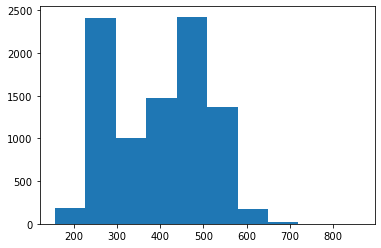

In [104]:
plt.hist(stats.boxcox(dowj_data['Volume'],lmbda=0.25))

In [167]:
Y = dowj_data[['Day_Range']]
X = dowj_data[['Volume']]

#X = stats.boxcox(dowj_data['Volume'], lmbda = 0.25)

#X = stats.boxcox(dowj_data['Day_Range'], lmbda = 0.25)

X_train, x_test, Y_train, y_test = tts(X, Y, test_size = .2, random_state = 1)

#X_train = np.reshape(X_train,(-1,1))
#Y_train = np.reshape(Y_train,(-1,1))
#x_test = np.reshape(x_test,(-1,1))
#y_test = np.reshape(y_test,(-1,1))

In [168]:
regression_model = LinearRegression()

regression_model.fit(X_train, Y_train)

LinearRegression()

In [169]:
intercept = regression_model.intercept_[0]
coeffecient = regression_model.coef_[0][0]

print("The coeffecient for our model is {:2}".format(coeffecient))

print("The intercept for our model is {:2}".format(intercept))

The coeffecient for our model is 6.811355834546615e-07
The intercept for our model is 28.788689896026384


In [170]:
prediction = regression_model.predict([[10000000]])
predicted_value = prediction[0][0]
print(predicted_value)

35.600045730573


In [171]:
y_predict = regression_model.predict(x_test)

y_predict[:5]

array([[44.50929916],
       [75.80747922],
       [34.41486982],
       [85.00962095],
       [45.98055202]])

In [172]:
X2 = sm.add_constant(X)

model = sm.OLS(Y,X2)

est = model.fit()

In [173]:
est.conf_int()

,0,1
const,2.927694e+01,3.539617e+01
Volume,6.396997e-07,6.707240e-07


In [174]:
est.pvalues

const     3.412248e-93
Volume    0.000000e+00
dtype: float64

In [175]:
model_mse = mean_squared_error(y_test, y_predict)

model_mae = mean_absolute_error(y_test, y_predict)

model_rmse = math.sqrt(model_mse)

print("MSE {: .3}".format(model_mse))
print("MSE {: .3}".format(model_mae))
print("MSE {: .3}".format(model_rmse))

MSE  9.31e+03
MSE  57.3
MSE  96.5


In [176]:
model_r2 = r2_score(y_test, y_predict)
print(model_r2)

0.372410796571215


In [177]:
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:              Day_Range   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     6855.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:09:29   Log-Likelihood:                -54504.
No. Observations:                9067   AIC:                         1.090e+05
Df Residuals:                    9065   BIC:                         1.090e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.3366      1.561     20.717      0.0

Text(0.5, 1.0, 'model residuals')

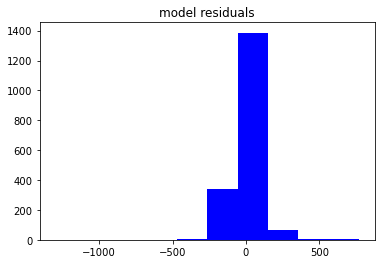

In [178]:
(y_test - y_predict).hist(grid = False, color = 'blue')
plt.title("model residuals")

Text(0, 0.5, 'Day Change')

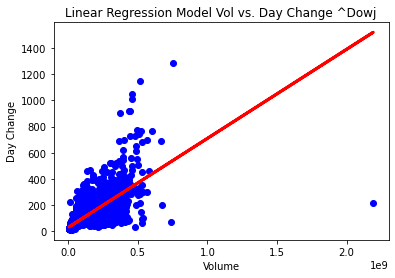

In [179]:
plt.scatter(x_test, y_test, color = 'blue', label = 'Day Change')
plt.plot(x_test, y_predict, color = 'red', linewidth = 3, linestyle = '-', label = 'Regression Line')
plt.title("Linear Regression Model Vol vs. Day Change ^Dowj")
plt.xlabel("Volume")
plt.ylabel("Day Change")